In [1]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Some configs
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 13

In [3]:
# Load data
df = pd.read_csv('./data/Buys_computer.csv')
x = df.drop('Buys_computer', axis='columns')
y = df['Buys_computer']

In [4]:
# Preprocessing data
from sklearn.preprocessing import LabelEncoder
x['Age_n'] = LabelEncoder().fit_transform(x['Age'])
x['Income_n'] = LabelEncoder().fit_transform(x['Income'])
x['Student_n'] = LabelEncoder().fit_transform(x['Student'])
x['Credit_rating_n'] = LabelEncoder().fit_transform(x['Credit_rating'])
x_n = x.drop(['Age', 'Income', 'Student', 'Credit_rating'], axis='columns')
y_n = LabelEncoder().fit_transform(y)

In [5]:
# Create model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
model = DecisionTreeClassifier(criterion='gini', random_state=10).fit(x_n, y_n)
# model = DecisionTreeClassifier(criterion='entropy', random_state=100).fit(x_n, y_n)

In [6]:
score = model.score(x_n, y_n)

In [7]:
# Visualize results
features = ['Age', 'Income', 'Student', 'Credit_rating']
text_representation = tree.export_text(model, feature_names=features)
print(text_representation)

|--- Age <= 0.50
|   |--- class: 1
|--- Age >  0.50
|   |--- Student <= 0.50
|   |   |--- Age <= 1.50
|   |   |   |--- class: 0
|   |   |--- Age >  1.50
|   |   |   |--- Credit_rating <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Credit_rating >  0.50
|   |   |   |   |--- class: 1
|   |--- Student >  0.50
|   |   |--- Credit_rating <= 0.50
|   |   |   |--- Age <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Credit_rating >  0.50
|   |   |   |--- class: 1



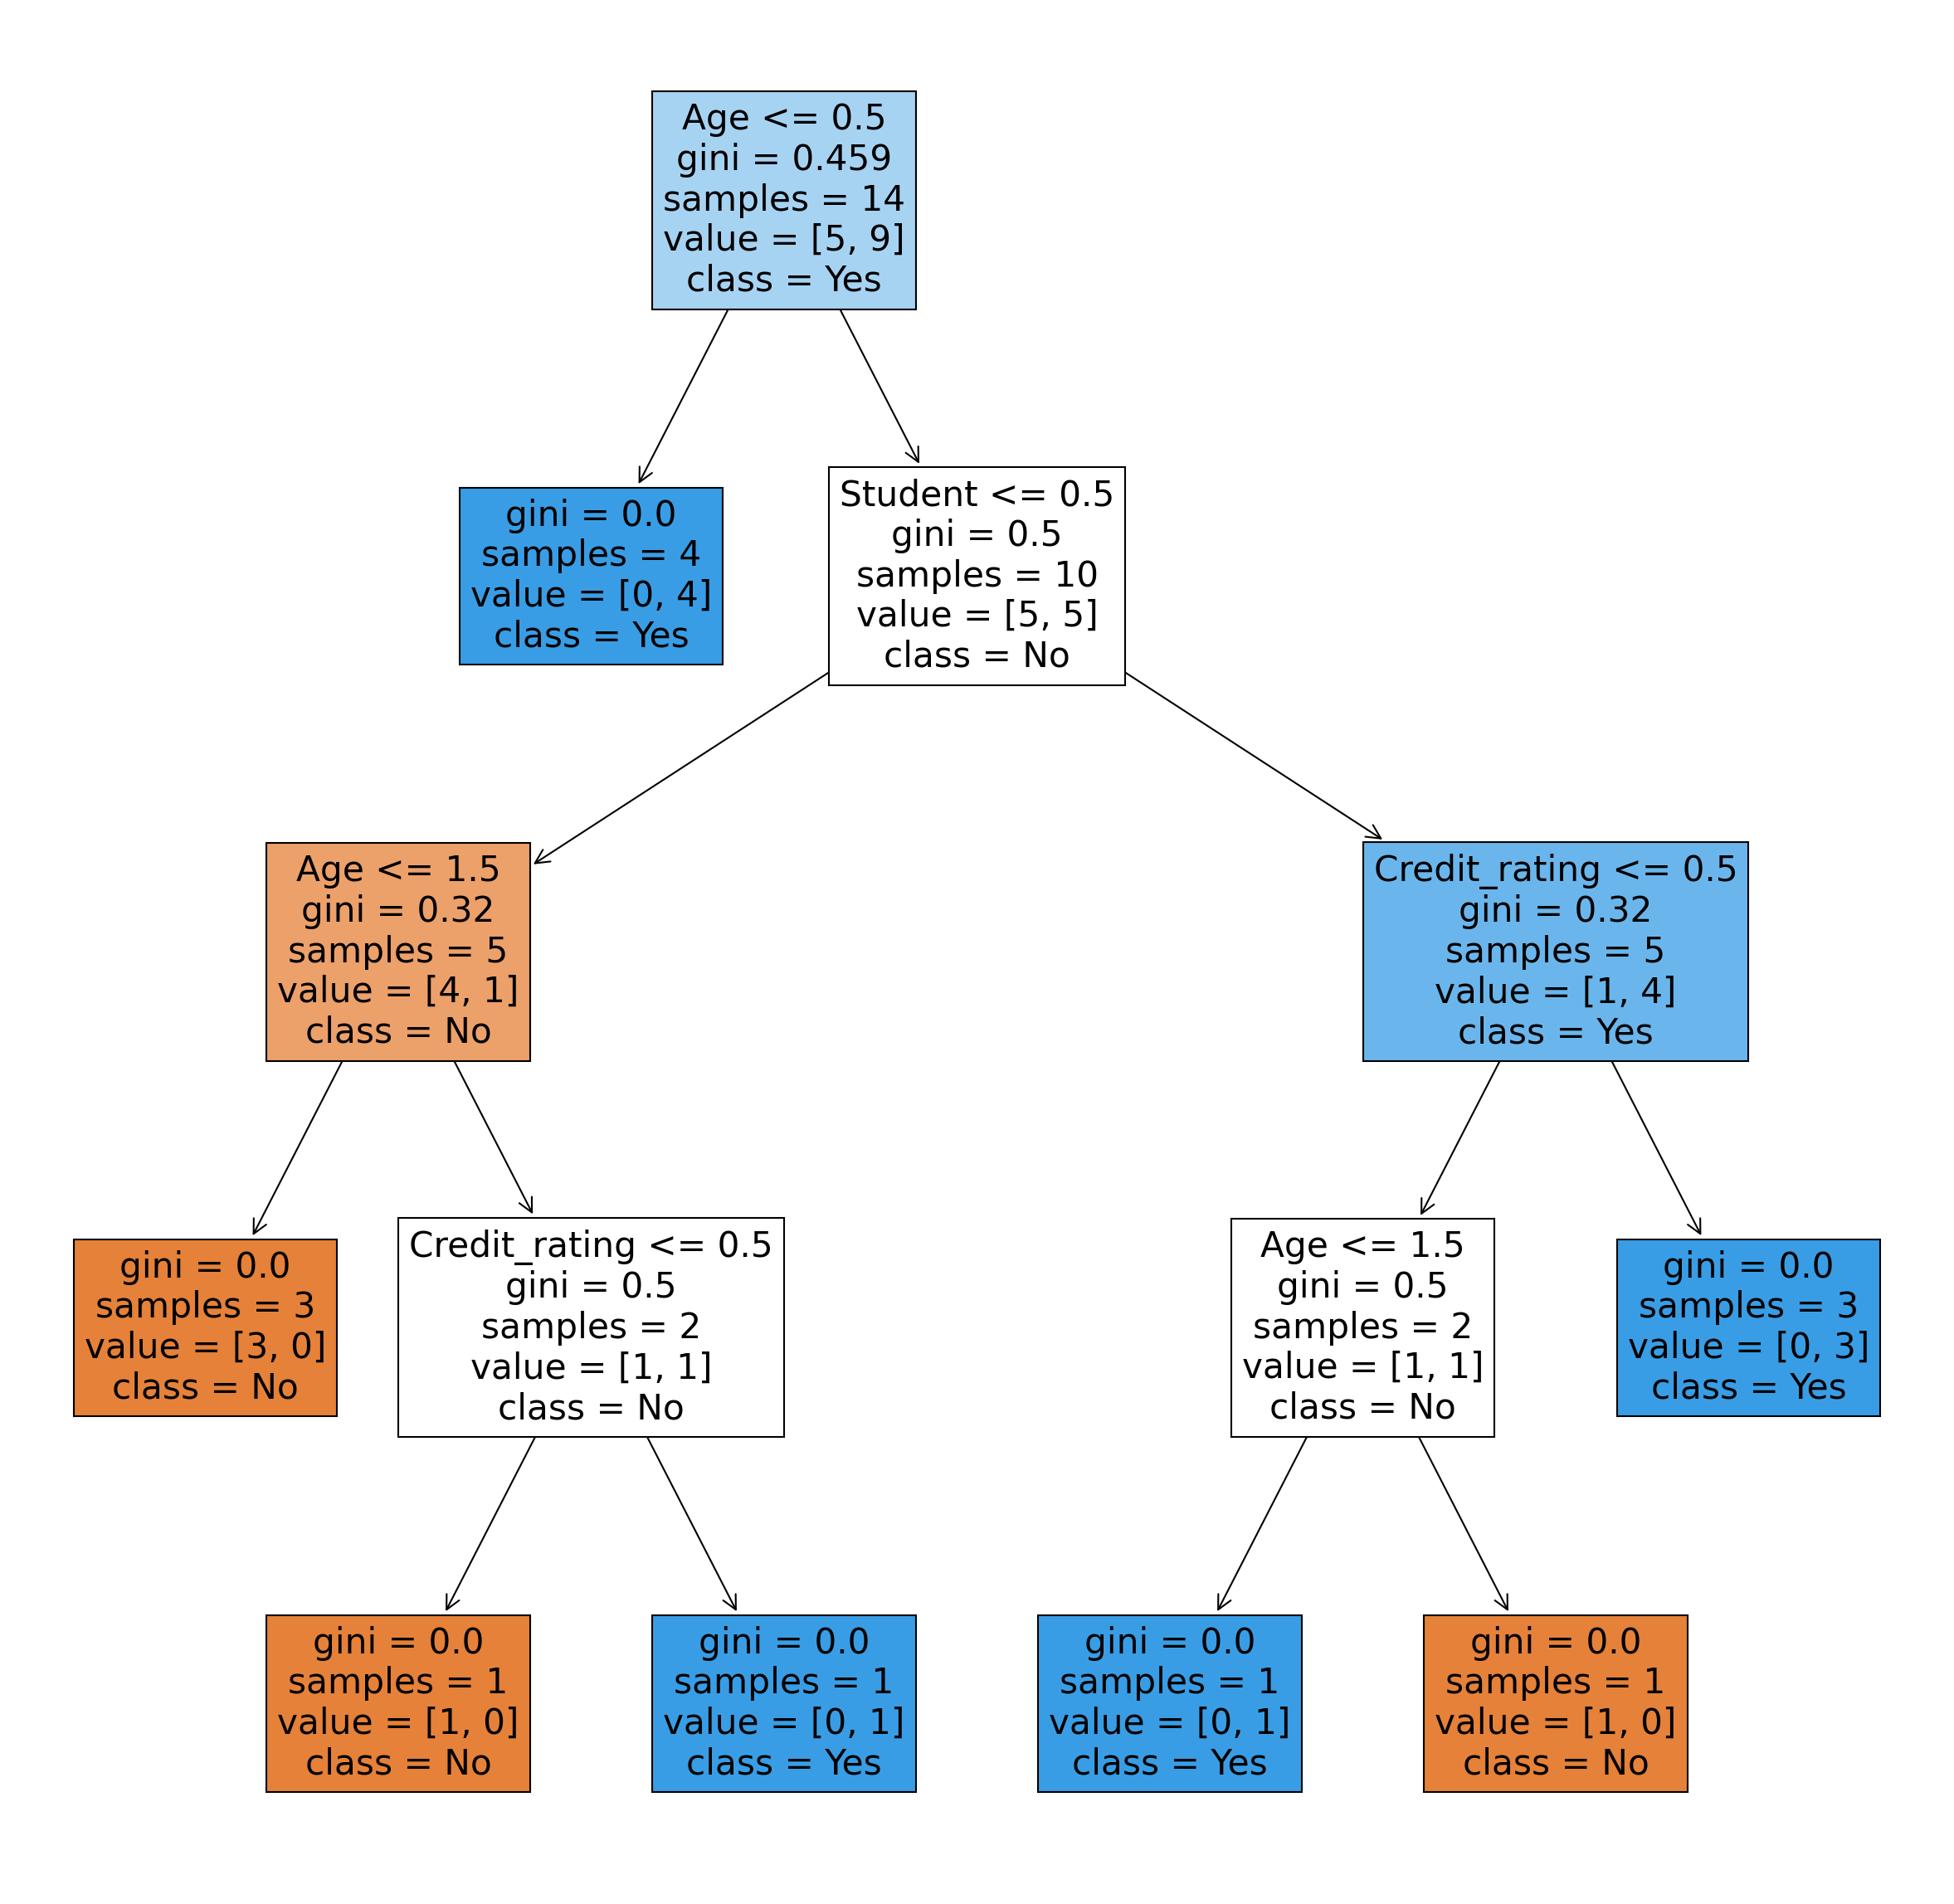

In [8]:
plt.figure(figsize=(20,20), dpi=150)
t = tree.plot_tree(model, feature_names=features, class_names=['No', 'Yes'], filled=True)

In [9]:
# Prediction
# Age: < 30, Income: low, Student: yes, Credit: fair?
buy_computer = model.predict([[1, 1, 1, 1]])
